In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
df=pd.read_csv(r'D:\data science\Brainwave Matrix Solutions\Task 2\tiktok_google_play_reviews.csv')

C:\Users\Mohamed Hagag\AppData\Local\Temp\ipykernel_20572\142312035.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'D:\data science\Brainwave Matrix Solutions\Task 2\tiktok_google_play_reviews.csv')


In [57]:
df.head(7)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0.0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0.0,0,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0.0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0.0,0,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0.0,0,2022-11-29 21:54:21,NaN,NaN
5,08dc9129-a16b-459a-9c58-4d63a0eebd26,Melvin Crawford,https://play-lh.googleusercontent.com/a/ALm5wu...,I love this amazing app,5,0.0,27.1.3,2022-11-29 21:52:53,NaN,NaN
6,1b22eaaa-c9a4-430b-b989-234fc8d756c4,Muhammad Rehan,https://play-lh.googleusercontent.com/a/ALm5wu...,Mohammed Rehan,5,0.0,27.1.3,2022-11-29 21:52:43,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460287 entries, 0 to 460286
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              460287 non-null  object
 1   userName              460287 non-null  object
 2   userImage             460287 non-null  object
 3   content               460256 non-null  object
 4   score                 460287 non-null  int64 
 5   thumbsUpCount         460287 non-null  int64 
 6   reviewCreatedVersion  333953 non-null  object
 7   at                    460287 non-null  object
 8   replyContent          260 non-null     object
 9   repliedAt             260 non-null     object
dtypes: int64(2), object(8)
memory usage: 35.1+ MB


In [7]:
df.nunique()

reviewId                460287
userName                406759
userImage               458973
content                 278476
score                        5
thumbsUpCount              692
reviewCreatedVersion       631
at                      452242
replyContent                81
repliedAt                  260
dtype: int64

In [36]:
df.isna().sum()

reviewId                     0
userName                     0
userImage                    0
content                     31
score                        0
thumbsUpCount                0
reviewCreatedVersion         0
at                           0
replyContent            460027
repliedAt               460027
dtype: int64

In [ ]:
#after null all date to 0 replace 0 to null
df.replace(0, np.nan, inplace=True)

In [35]:
df['reviewCreatedVersion'].fillna(0,inplace=True)
df['thumbsUpCount'].fillna(0,inplace=True)

C:\Users\Mohamed Hagag\AppData\Local\Temp\ipykernel_20572\1064654439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thumbsUpCount'].fillna(0,inplace=True)


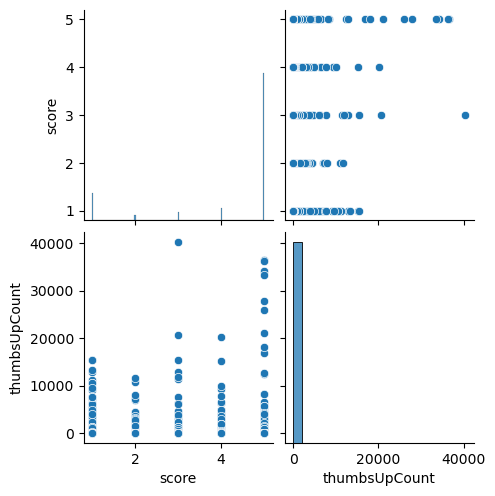

In [ ]:
#show data
sns.pairplot(df)
plt.show()

In [ ]:
#check duplicated
df.duplicated().sum()

0

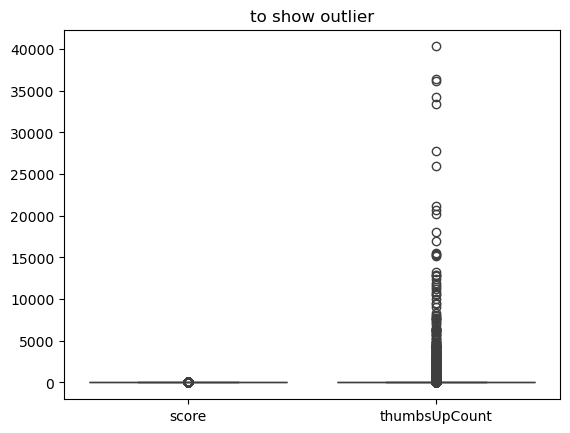

In [ ]:
sns.boxplot(df)
plt.title("to show outlier")
plt.show()

In [ ]:
#check outlier

Q1=df['score'].quantile(0.25)
Q3=df['score'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outlier=df[(df['score']>=lower_bound) & (df['score']<=upper_bound)]
outlier


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0.0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0.0,0,2022-11-29 21:55:04,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0.0,0,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0.0,0,2022-11-29 21:54:21,NaN,NaN
5,08dc9129-a16b-459a-9c58-4d63a0eebd26,Melvin Crawford,https://play-lh.googleusercontent.com/a/ALm5wu...,I love this amazing app,5,0.0,27.1.3,2022-11-29 21:52:53,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
460281,d2ef5b27-2a18-442f-92cb-b88b8dd750b4,Bff Mavneet,https://play-lh.googleusercontent.com/a-/ACNPE...,I love it,5,0.0,24.9.2,2022-06-18 12:36:19,NaN,NaN
460282,73cf78fe-599d-4488-8a8b-ae443847303b,hera killar,https://play-lh.googleusercontent.com/a-/ACNPE...,😍😍,5,0.0,0,2022-06-18 12:35:32,NaN,NaN
460284,fbb86777-b885-4f76-b49e-13e424aa5afc,Md. Zahid Hasan,https://play-lh.googleusercontent.com/a-/ACNPE...,Nice,5,0.0,24.8.3,2022-06-18 12:34:39,NaN,NaN
460285,28df682c-bb17-4224-8658-642a92a2c723,Ash Ryan,https://play-lh.googleusercontent.com/a-/ACNPE...,TikTok love your sad,5,0.0,0,2022-06-18 12:34:38,NaN,NaN


In [48]:
df.describe()

,score,thumbsUpCount
count,460287.000000,460287.000000
mean,4.234919,3.210601
std,1.430718,183.506791
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,40311.000000


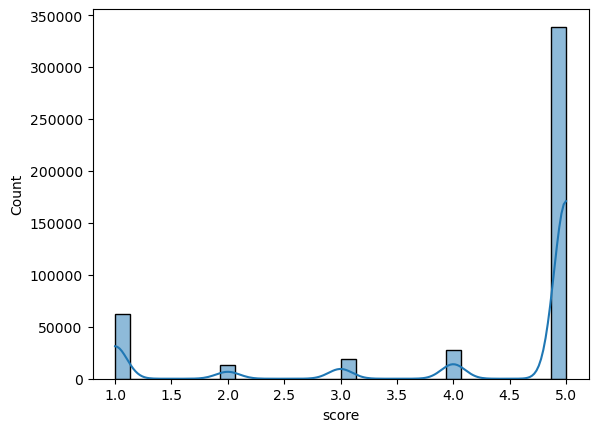

In [50]:
sns.histplot(df['score'],bins=30,kde=True)
plt.show()

In [52]:
#معرفه كل reviewCreatedVersion عل رضاء المستخدمين 
avg_rating_per_version = df.groupby('reviewCreatedVersion')['score'].mean().reset_index()
avg_rating_per_version

,reviewCreatedVersion,score
0,0,4.074335
1,10.1.0,4.300000
2,10.1.1,2.333333
3,10.1.10,3.090909
4,10.1.9,2.750000
...,...,...
627,9.9.5,3.461538
628,99.0.00,3.836735
629,99.0.1,3.821192
630,99.0.2,3.799795


In [53]:
#اكثر التقيمات التي حصلت عل اعجاب 
most_liked_reviews = df.groupby('score')['thumbsUpCount'].sum().reset_index()
most_liked_reviews


,score,thumbsUpCount
0,1,362023.0
1,2,165210.0
2,3,269083.0
3,4,199861.0
4,5,481621.0


In [60]:
# علي حسب التحديث ممكن اعرف حصلت على اهتمام من تيك توك عبر الردود 

replied_reviews_per_version = df[df['replyContent'].notna()].groupby('reviewCreatedVersion').size().reset_index(name='reply_count')


In [59]:
#Export data to CSV

df.to_csv("tiktok_review_AfterEdit.csv",index=False)